In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np

In [2]:
# Prepare Dataset
train_transform = transforms.Compose([
    transforms.ToTensor()
])
clean_train_dataset = datasets.CIFAR10(root='/vulcanscratch/psando/cifar-10/', train=True, download=False, transform=train_transform)
unlearnable_train_dataset = datasets.CIFAR10(root='/vulcanscratch/psando/cifar-10/', train=True, download=False, transform=train_transform)

In [4]:
unlearnable_train_dataset[0][0].shape

torch.Size([3, 32, 32])

In [23]:
noise = torch.load('/cfarhomes/psando/Documents/Unlearnable-Examples/experiments/cifar10/min-min_samplewise/CIFAR10-eps=8-se=0.01-base_version=resnet18/perturbation.pt')

perturb_noise = noise.mul(255).clamp_(0, 255).permute(0, 2, 3, 1).to('cpu').numpy()
unlearnable_train_dataset.data = unlearnable_train_dataset.data.astype(np.float32)
for i in range(len(unlearnable_train_dataset)):
    unlearnable_train_dataset.data[i] += perturb_noise[i]
    unlearnable_train_dataset.data[i] = np.clip(unlearnable_train_dataset.data[i], a_min=0, a_max=255)
unlearnable_train_dataset.data = unlearnable_train_dataset.data.astype(np.uint8)

In [24]:
unlearnable_loader = DataLoader(dataset=unlearnable_train_dataset, batch_size=8,
                                shuffle=False, pin_memory=False,
                                drop_last=False, num_workers=1)

clean_loader = DataLoader(dataset=clean_train_dataset, batch_size=8,
                                shuffle=False, pin_memory=False,
                                drop_last=False, num_workers=1)

In [25]:
img, label = next(iter(unlearnable_loader))

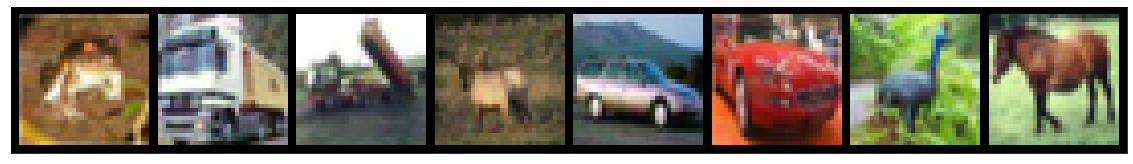

In [26]:
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

plt.rcParams["savefig.bbox"] = 'tight'

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(20,20))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        
show(torchvision.utils.make_grid(img))

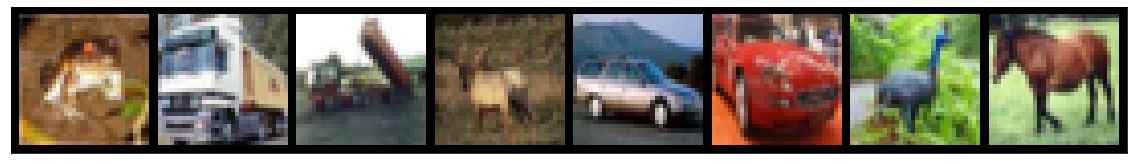

In [27]:
clean_img, _ = next(iter(clean_loader))
show(torchvision.utils.make_grid(clean_img))

In [28]:
delta = img - clean_img

In [29]:
torch.norm(delta, p=np.inf, dim=(1,2,3))

tensor([0.0314, 0.0314, 0.0314, 0.0314, 0.0314, 0.0314, 0.0314, 0.0314])